In [1]:
!ls -lh /home/yfreund/dpr_data/

total 510M
-rw-r--r-- 1 yfreund freund 510M Mar 25 01:32 QG-ts-en-10.npz
drwxr-xr-x 2 yfreund freund 4.0K Mar 17 14:38 samples


In [9]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [10]:
A=np.load('/home/yfreund/dpr_data/QG-ts-en-10.npz')

In [11]:
A['ens'].shape

(401, 10, 16641)

In [12]:
ens=A['ens'].reshape([401,10,129,129])

In [14]:
#plt.imshow(ens[-1,0,:,:])

In [46]:
def animate(frames):
    ims=[]
    for i in range(len(frames)):
        frame=frames[i]
        im = ax.imshow(frame, animated=True)
        ims.append([im])
    return ims


<IPython.core.display.Javascript object>


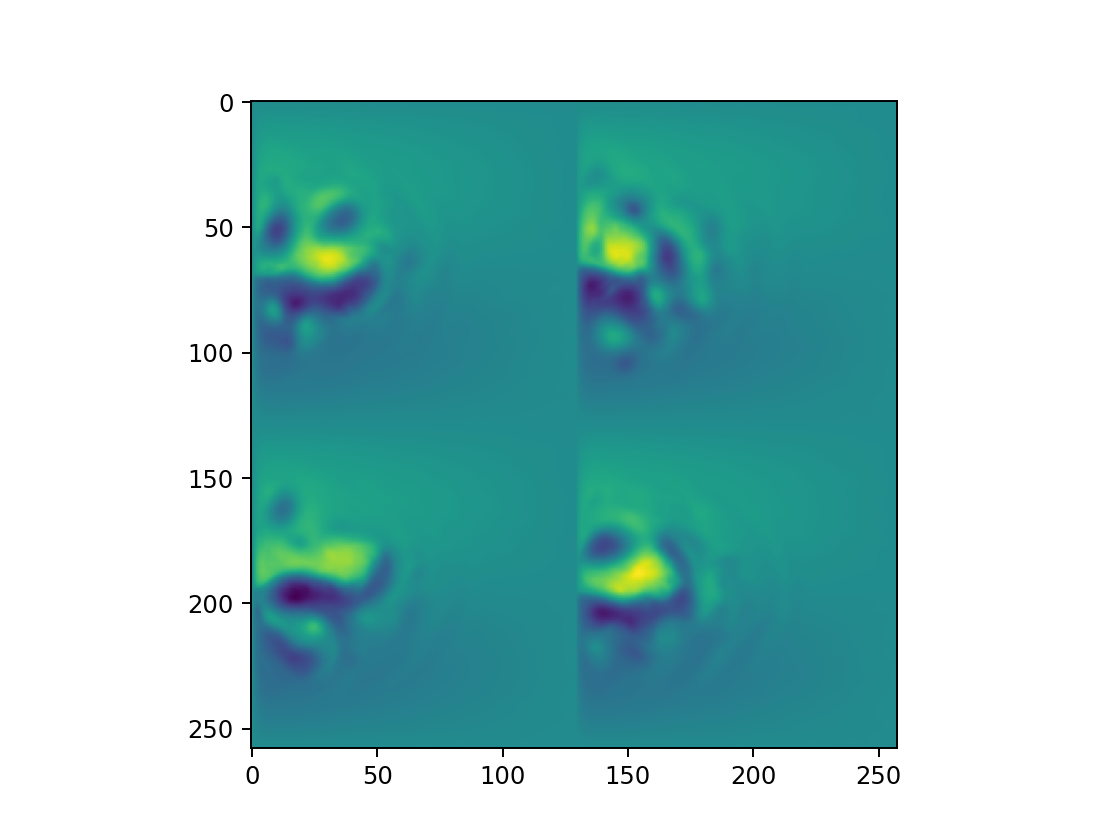

generated QG-ensemble.mp4


In [47]:
frames=[]
for i in range(ens.shape[0]):
    frame=np.vstack([np.hstack([ens[i,1,:,:],ens[i,2,:,:]]),
                     np.hstack([ens[i,3,:,:],ens[i,4,:,:]])])
    frames.append(frame)
fig, ax = plt.subplots()
ims=animate(frames)

#ax.imshow(frames[0])  # show an initial one first
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
filename='QG-ensemble.mp4'
ani.save(filename)
print('generated',filename)

In [54]:
_range=np.max(ens,axis=1) - np.min(ens,axis=1)

In [55]:
_range.shape

(401, 129, 129)

<IPython.core.display.Javascript object>


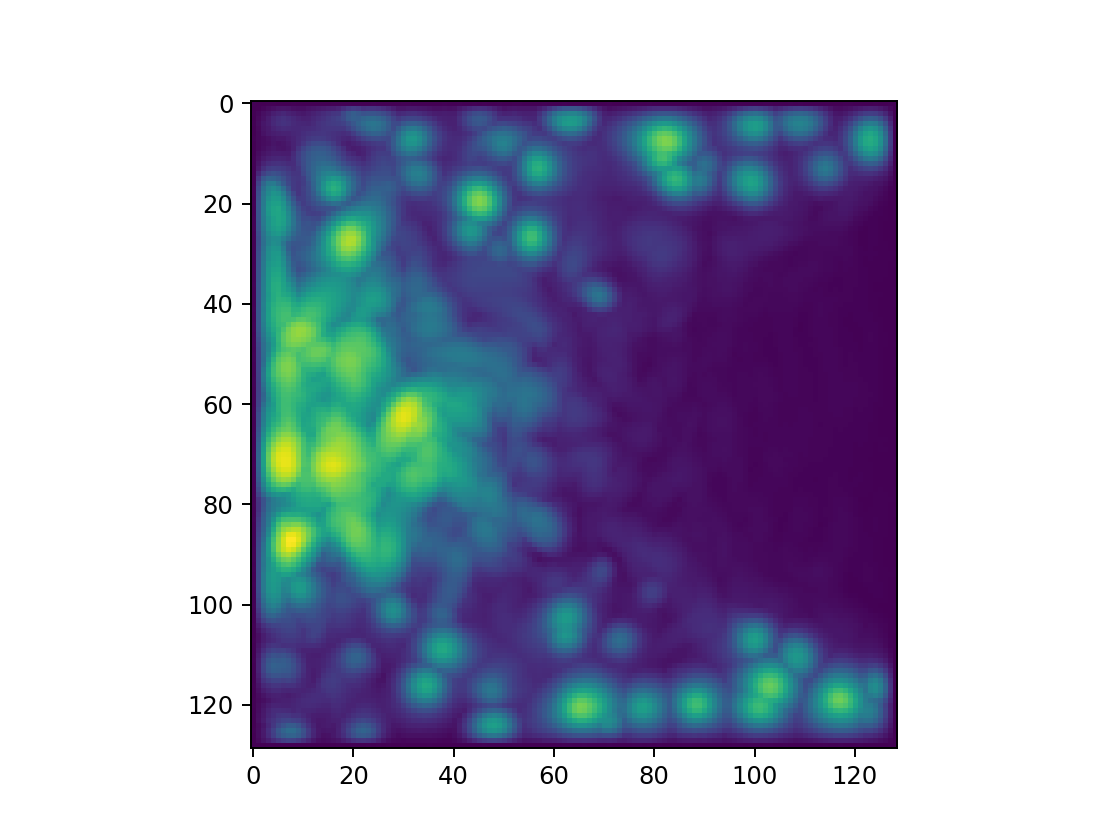

generated QG-range.mp4


In [56]:
frames=[]
for i in range(_range.shape[0]):
    frames.append(_range[i,:,:])

fig, ax = plt.subplots()
ims=animate(frames)

#ax.imshow(frames[0])  # show an initial one first
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
filename='QG-range.mp4'
ani.save(filename)
print('generated',filename)

In [57]:
ens.shape

(401, 10, 129, 129)